In [48]:
import numpy as np
import itertools as it
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import itertools

# Задания к 5 уроку
#### 1. Напишите код, моделирующий выпадение поля в рулетке (с учетом поля зеро).

In [2]:
roulete = {}
numbers = list(range(37))
for i in numbers:
    roulete[str(i)] = 0

In [3]:
n = 1000000
for _ in range(0, n):
    x = np.random.randint(0, 37)
    roulete[str(x)] += 1

In [4]:
ver = 0
for v in roulete.values():
    ver += v/n
ver

1.0

####  2. 1) Напишите код, проверяющий любую из теорем сложения или умножения вероятности на примере рулетки или подбрасывания монетки.

In [5]:
k = 0
m = 0
n = 1000000
for _ in range(0, n):
    x = np.random.uniform(0, 1)
    if x < 0.5:
        k += 1
    else:
        m += 1
print(k, m)

499998 500002


In [6]:
ver_k = k/n
ver_m = m/n

In [7]:
# Складываем вероятности
ver_k+ver_m

1.0

In [8]:
# Умножаем вероятности, чтобы узнать вероятность выпадения последовательности из решки и орла
ver_k*ver_m

0.24999999999599998

#### 2) Сгенерируйте десять выборок случайных чисел х0, …, х9. И постройте гистограмму распределения случайной суммы х0+х1+ …+ х9.

In [35]:
n = 10
m = 100000
x = {}
for i in range(0, n):
    x[str(i)] = np.random.rand(m)

In [36]:
sum_x = 0
for v in x.values():
    sum_x += v
sum_x

array([5.58633162, 3.68387149, 4.14942075, ..., 7.01081517, 4.29948679,
       5.74087405])

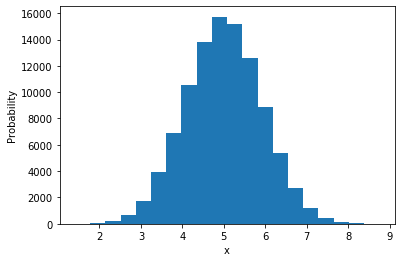

In [47]:
num_bins = 20
plt.hist(sum_x, num_bins)
plt.xlabel('x')
plt.ylabel('Probability')
plt.show()

#### 3. 1) Дополните код Монте-Карло последовательности независимых испытаний расчетом соответствующих вероятностей (через биномиальное распределение)  и сравните результаты.

In [79]:
n = 100000
a = np.random.randint(0, 2, n)
b = np.random.randint(0, 2, n)
c = np.random.randint(0, 2, n)
d = np.random.randint(0, 2, n)
x = a + b + c + d

In [70]:
k = 0
for i in range(0, n):
    if x[i] == 2:
        k += 1
print(k, n, k/n)

37557 100000 0.37557


In [71]:
c4_2 = np.math.factorial(4)/(np.math.factorial(2)*np.math.factorial(4-2))
c4_2

6.0

Видно, что выше вероятность при увеличении кол-ва экспериментов стремится к 0,375, что совпадает с расчетом по формуле Бернулли

In [72]:
p4_2 = c4_2 * (1/2**4)
p4_2

0.375

#### 2) Повторите расчеты биномиальных коэффициентов и вероятностей k успехов в последовательности из n независимых испытаний, взяв другие значения n и k.

In [234]:
z = 10000
k = 3
n = 5
q = 2
a = {}
x = 0
for i in range(0, n):
    a[str(i)] = np.random.randint(0, q, z)
    x += a[str(i)]
x

array([2, 2, 5, ..., 1, 3, 3])

In [235]:
y = 0
for i in range(0, z):
    if x[i] == k:
        y += 1
print(y, z, y/z)

3079 10000 0.3079


In [236]:
ck_n = np.math.factorial(n)/(np.math.factorial(k)*np.math.factorial(n-k))
ck_n

10.0

In [237]:
p = (1/q)
p

0.5

In [238]:
pk_n = ck_n * (p**k) * ((1-p)**(n-k))
pk_n

0.3125

#### 4. Из урока по комбинаторике повторите расчеты, сгенерировав возможные варианты перестановок для других значений n и k

In [248]:
n = 3

In [249]:
for p in itertools.product('01', repeat=n):
    print(''.join(p))

000
001
010
011
100
101
110
111


In [262]:
for p in itertools.permutations('0123456', 3):
    print(''.join(str(x) for x in p))

012
013
014
015
016
021
023
024
025
026
031
032
034
035
036
041
042
043
045
046
051
052
053
054
056
061
062
063
064
065
102
103
104
105
106
120
123
124
125
126
130
132
134
135
136
140
142
143
145
146
150
152
153
154
156
160
162
163
164
165
201
203
204
205
206
210
213
214
215
216
230
231
234
235
236
240
241
243
245
246
250
251
253
254
256
260
261
263
264
265
301
302
304
305
306
310
312
314
315
316
320
321
324
325
326
340
341
342
345
346
350
351
352
354
356
360
361
362
364
365
401
402
403
405
406
410
412
413
415
416
420
421
423
425
426
430
431
432
435
436
450
451
452
453
456
460
461
462
463
465
501
502
503
504
506
510
512
513
514
516
520
521
523
524
526
530
531
532
534
536
540
541
542
543
546
560
561
562
563
564
601
602
603
604
605
610
612
613
614
615
620
621
623
624
625
630
631
632
634
635
640
641
642
643
645
650
651
652
653
654


In [273]:
for p in itertools.combinations('012345', 4):
    print(''.join(p))

0123
0124
0125
0134
0135
0145
0234
0235
0245
0345
1234
1235
1245
1345
2345


#### 5. Дополните код расчетом коэффициента корреляции x и y по формуле R

0.5365173571086087 0.245770089241387
0.536517357108608 0.24577008924138732


C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  from ipykernel import kernelapp as app


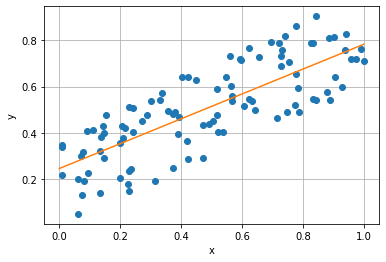

In [302]:
n = 100
r = 0.6
x = np.random.rand(n)
y = r*x + (1-r)*np.random.rand(n)

plt.plot(x, y, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

a = (np.sum(x)*np.sum(y) - n*np.sum(x*y))/(np.sum(x)**2 - n*np.sum(x**2))
b = (np.sum(y) - a*np.sum(x))/n

A = np.vstack([x, np.ones(len(x))]).T
a1, b1 = np.linalg.lstsq(A, y)[0]
print(a, b)
print(a1, b1)
plt.plot([0, 1], [b, a + b])
plt.show()

In [303]:
x_mean = np.mean(x)
y_mean = np.mean(y)
R = np.sum((x - x_mean)*(y - y_mean))/(np.sum((x - x_mean)**2)*np.sum((y - y_mean)**2))**0.5
R

0.7917224037373413